In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


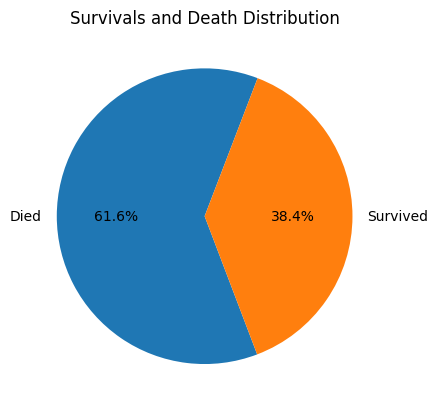

In [8]:
figsize=(5,5)
plt.pie(train['Survived'].value_counts(),labels=['Died','Survived'],autopct='%1.1f%%',startangle=69)
plt.title('Survivals and Death Distribution')
plt.show()

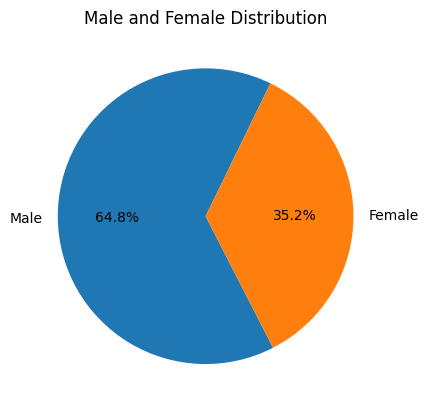

In [9]:
figsize=(5,5)
plt.pie(train['Sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',startangle=64)
plt.title('Male and Female Distribution')
plt.show()

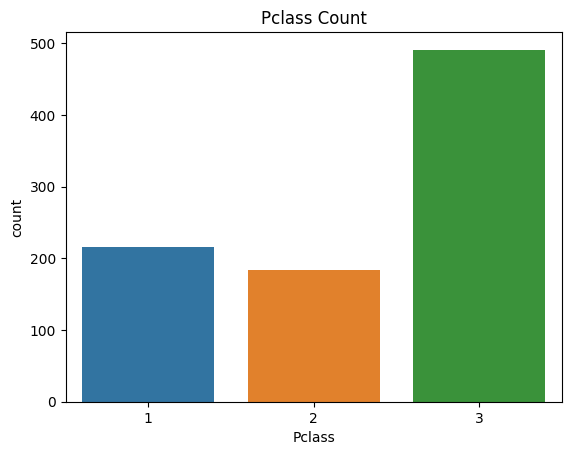

In [10]:
sns.countplot(x=train["Pclass"])
plt.title("Pclass Count")
plt.show()

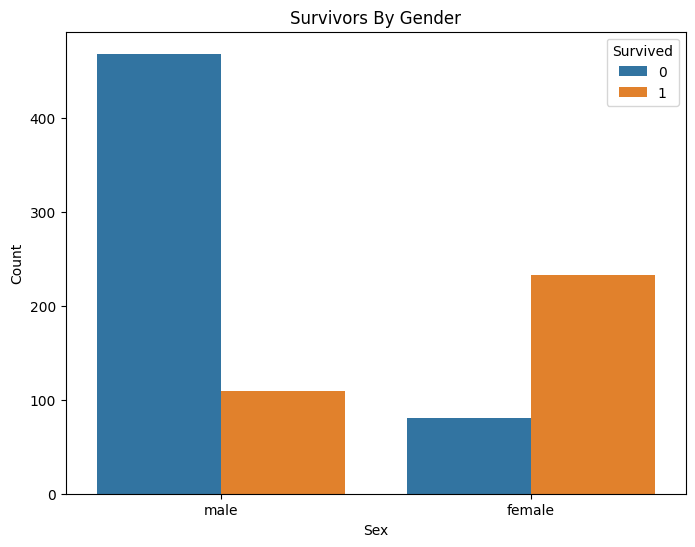

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x=train["Sex"],hue=train['Survived'] )
plt.title('Survivors By Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

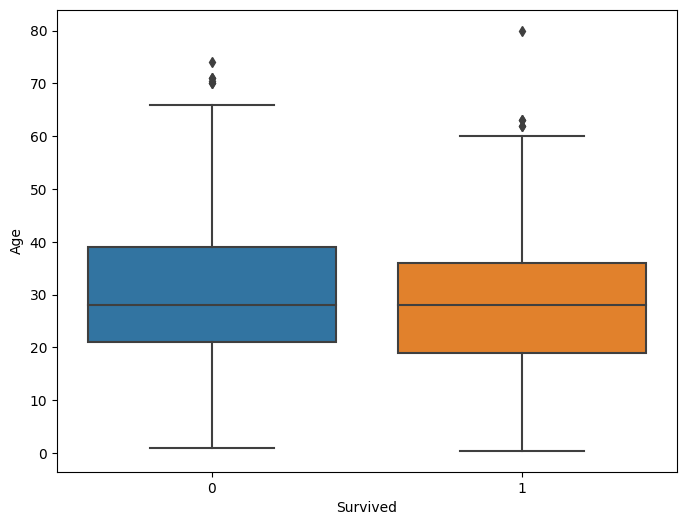

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train["Survived"], y=train["Age"])
plt.show()

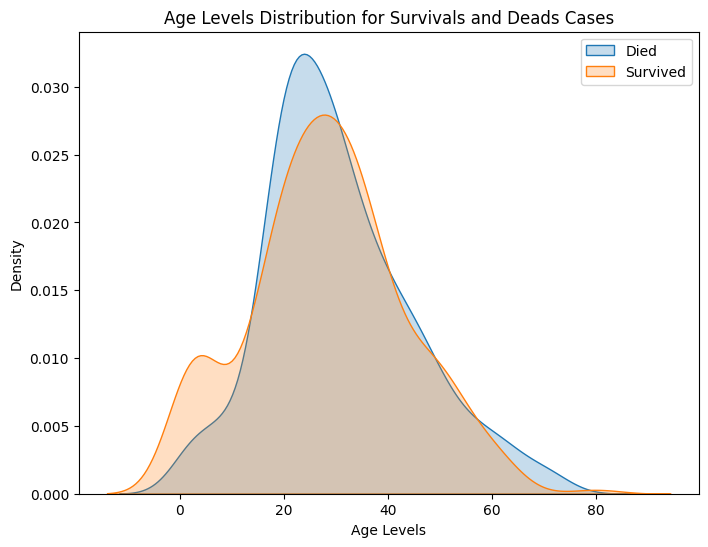

In [13]:
plt.figure(figsize=(8, 6))
sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Died', shade=True)
sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('Age Levels Distribution for Survivals and Deads Cases')
plt.xlabel('Age Levels')
plt.ylabel('Density')
plt.legend()
plt.show()

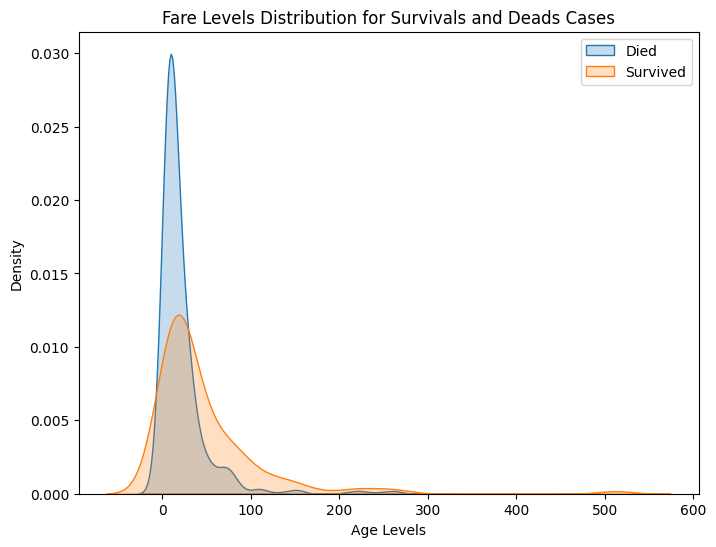

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(train[train['Survived'] == 0]['Fare'], label='Died', shade=True)
sns.kdeplot(train[train['Survived'] == 1]['Fare'], label='Survived', shade=True)
plt.title('Fare Levels Distribution for Survivals and Deads Cases')
plt.xlabel('Age Levels')
plt.ylabel('Density')
plt.legend()
plt.show()

In [15]:
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Embarked']=train['Embarked'].fillna(0)
train['Cabin']=train['Cabin'].fillna("Unknown")
#------------------------------------------------------------------------
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Embarked']=test['Embarked'].fillna(0)
test['Cabin']=test['Cabin'].fillna("Unknown")
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [16]:
train = train.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1)
test = test.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1)
train.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
test.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

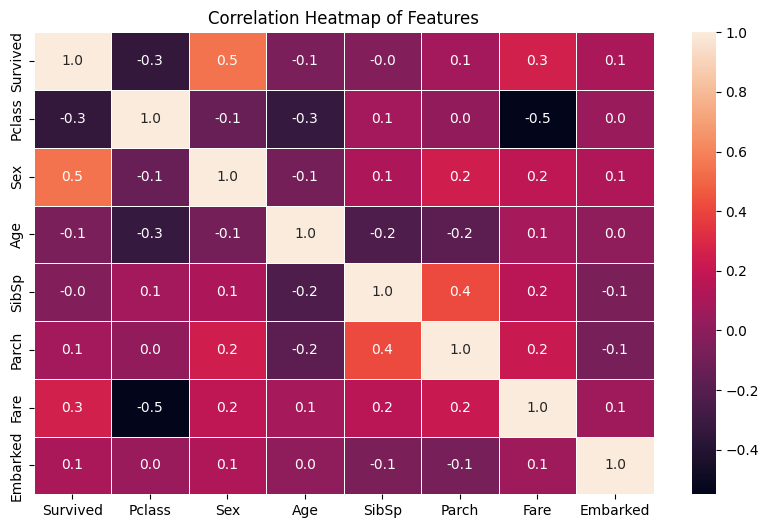

In [17]:
plt.figure(figsize=(10,6)) 
plt.title('Correlation Heatmap of Features')
sns.heatmap(train.corr(),annot=True,fmt='0.1f', linewidth=0.5) 
plt.show()

In [18]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [19]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [20]:
x=train.iloc[:,1:]
y=train.iloc[:,0]

In [21]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
# Display the preprocessed training data


In [22]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score ,recall_score
# Calculate accuracy
print("training Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("training precision ",precision_score(y_train, y_train_pred)*100)
print("training recall ",recall_score(y_train, y_train_pred)*100)
print('------------------------------------------------------------------------------------------------')
print("testing Accuracy",accuracy_score(y_test, y_test_pred)*100)
print("testing precision",precision_score(y_test, y_test_pred)*100)
print("testing recall",recall_score(y_test, y_test_pred)*100)

training Accuracy 80.33707865168539
training precision  75.51867219917013
training recall  69.20152091254754
------------------------------------------------------------------------------------------------
testing Accuracy 79.88826815642457
testing precision 82.08955223880598
testing recall 69.62025316455697


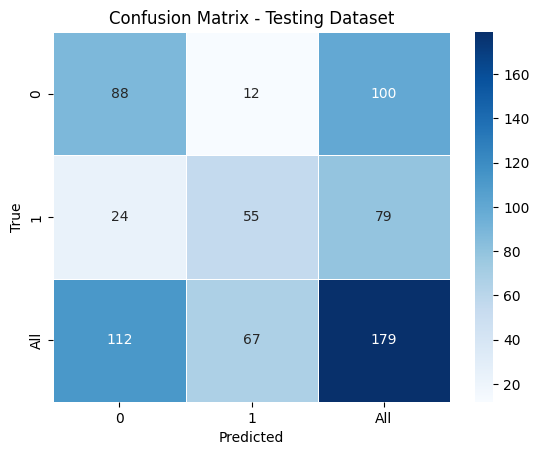

In [25]:
conf_matrix=pd.crosstab(np.array(y_test).ravel(), y_test_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Confusion Matrix - Testing Dataset')
plt.show()